In [1]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
from soda import profiles

In [3]:
# Initial conditions!

sat_pos = np.array([-1, -41, -28])
sat_vel = np.array([-57, -226, 221])
pos_host = np.array([0,0,0])
vel_host = np.array([0,0,0])
host_model = ['NFW', 1E12, 261, 9.86]
disk_params = [6.5E10, 3.5, 0.53]
bulge_params = [1E10, 0.7]
alpha = [0, 1]
time = 8.0
d_t = [0.1, 0.01, 0.001]

In [4]:
# From Gomez 15 et al
sat_mass = [3E10, 5E10, 8E10, 1E11, 1.8E11, 2.5E11]
sat_rs = [8, 11, 14, 15, 20, 22.5]



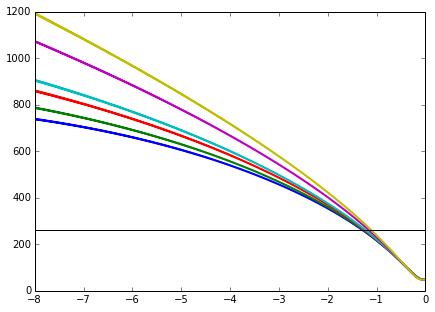

In [5]:
#for i in range(0,3):
figure(figsize=(7,5))

for i in range(6):
    sat_model = ['plummer', sat_mass[i], sat_rs[i]]
    t, xyz_sat, vxyz_sat, xyz_host, vxyz_host = integrate(time, sat_pos, sat_vel, pos_host, 
                                                          vel_host, host_model, sat_model, 
                                                          disk_params, bulge_params, dfric=1,
                                                          alpha=alpha, dt=0.01, direction=1)
    plot(t, np.sqrt((xyz_sat[:,0]-xyz_host[:,0])**2.0+(xyz_sat[:,1]-xyz_host[:,1])**2.0
                    +(xyz_sat[:,2]-xyz_host[:,2])**2.0), lw=2.0)
    plt.axhline(261, lw=1.0, c='k')

In [7]:
data = np.loadtxt('../../orbits/data/gomezfig1sat3_test_host.txt')

data_sat = np.loadtxt('../../orbits/data/gomezfig1sat3_test_sat.txt')

In [8]:
x_host = data[:,1]
y_host = data[:,2]
z_host = data[:,3]
vx_host = data[:,4]

x_sat = data_sat[:,1]
y_sat = data_sat[:,2]
z_sat = data_sat[:,3]

time = data[:,0]

In [9]:
z_sat[:10]

array([-28.      , -30.260194, -32.478222, -34.677762, -36.835186,
       -38.956429, -41.036267, -43.063968, -45.052301, -46.974987])

In [10]:
xyz_sat[:10,2]

array([-28.        , -30.21      , -32.38721578, -34.5482499 ,
       -36.67668483, -38.77350213, -40.83874537, -42.85846593,
       -44.84908783, -46.78234569])

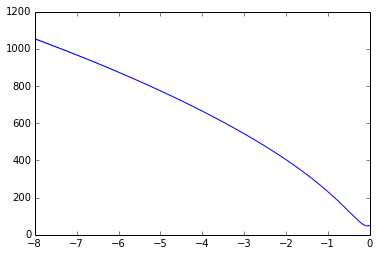

In [11]:
plot(time, np.sqrt((x_host-x_sat)**2+(y_host-y_sat)**2.0+(z_host-z_sat)**2.0))